In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import data_process as dp
import importlib
%matplotlib inline

importlib.reload(dp)
sns.set_theme()

dp.process()

In [28]:
df = pd.read_csv("cross_zz500_avg20.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,start_date,end_date,days,start_price,end_price
0,2005-02-21,2005-03-15,16,981.819,993.831
1,2005-04-08,2005-04-12,2,949.457,927.410
2,2005-04-13,2005-04-15,2,950.229,913.271
3,2005-06-08,2005-06-15,5,841.360,796.260
4,2005-06-20,2005-06-30,8,823.733,791.502


In [29]:
df["delta"] = df["end_price"] - df["start_price"]
df["win"] = df["delta"] > 0
df.head()

,start_date,end_date,days,start_price,end_price,delta,win
0,2005-02-21,2005-03-15,16,981.819,993.831,12.012,True
1,2005-04-08,2005-04-12,2,949.457,927.410,-22.047,False
2,2005-04-13,2005-04-15,2,950.229,913.271,-36.958,False
3,2005-06-08,2005-06-15,5,841.360,796.260,-45.100,False
4,2005-06-20,2005-06-30,8,823.733,791.502,-32.231,False


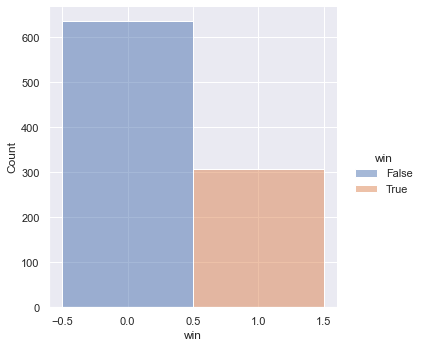

In [33]:
# univariate histograms
sns.displot(data=df, x="win", hue="win", discrete=True)

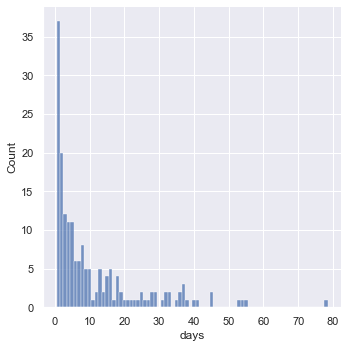

In [35]:
sns.displot(data=df, x="days", discrete=True)

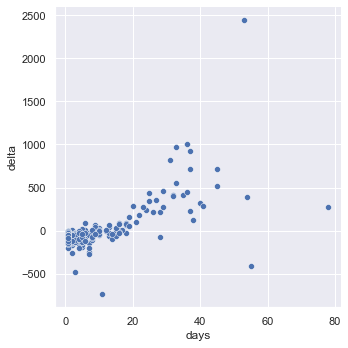

In [31]:
sns.relplot(data=df, x="days", y="delta")

看上去和一次周期的时间跨度有关系，如果跨度能超过20天（用的是20日均线），盈利的可能性才比较大。

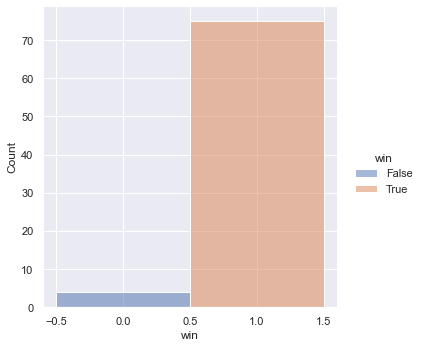

In [34]:
df2 = df.loc[df.days > 20]
sns.displot(data=df2, x="win", hue="win", discrete=True)

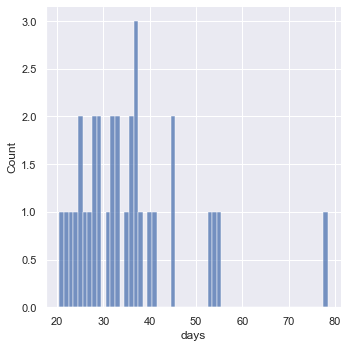

In [36]:
sns.displot(data=df2, x="days", discrete=True)

In [12]:
alldf = pd.read_hdf("cross_avg_index.h5", key="cross_index")
alldf["delta"] = alldf["end_price"] - alldf["start_price"]
alldf["win"] = alldf["delta"] > 0
print(len(alldf))
alldf.head()

3084


,index_type,avg_type,start_date,end_date,days,start_price,end_price,delta,win
0,sz50,avg5,2004-01-29,2004-01-30,1,1100.604,1067.553,-33.051,False
1,sz50,avg5,2004-02-02,2004-02-10,6,1091.729,1120.961,29.232,True
2,sz50,avg5,2004-02-16,2004-03-03,12,1123.748,1072.639,-51.109,False
3,sz50,avg5,2004-03-10,2004-03-18,6,1091.097,1111.849,20.752,True
4,sz50,avg5,2004-03-19,2004-03-23,2,1129.775,1121.332,-8.443,False


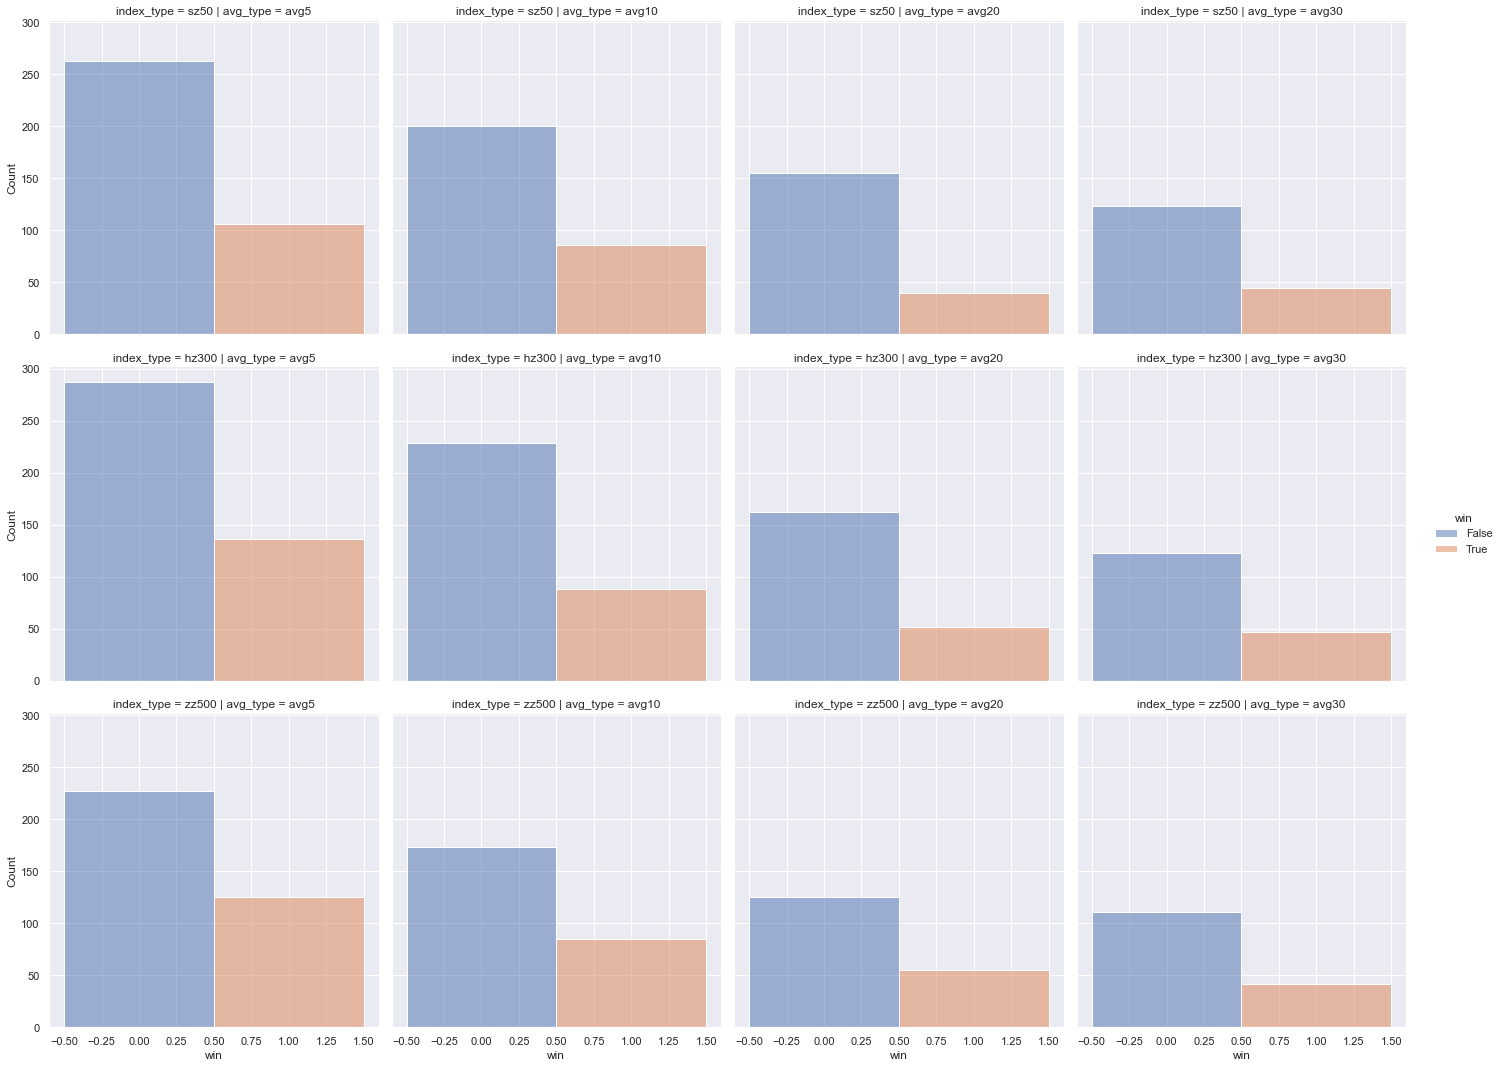

In [32]:
sns.displot(data=alldf, x="win", hue="win", discrete=True, row="index_type", col="avg_type")

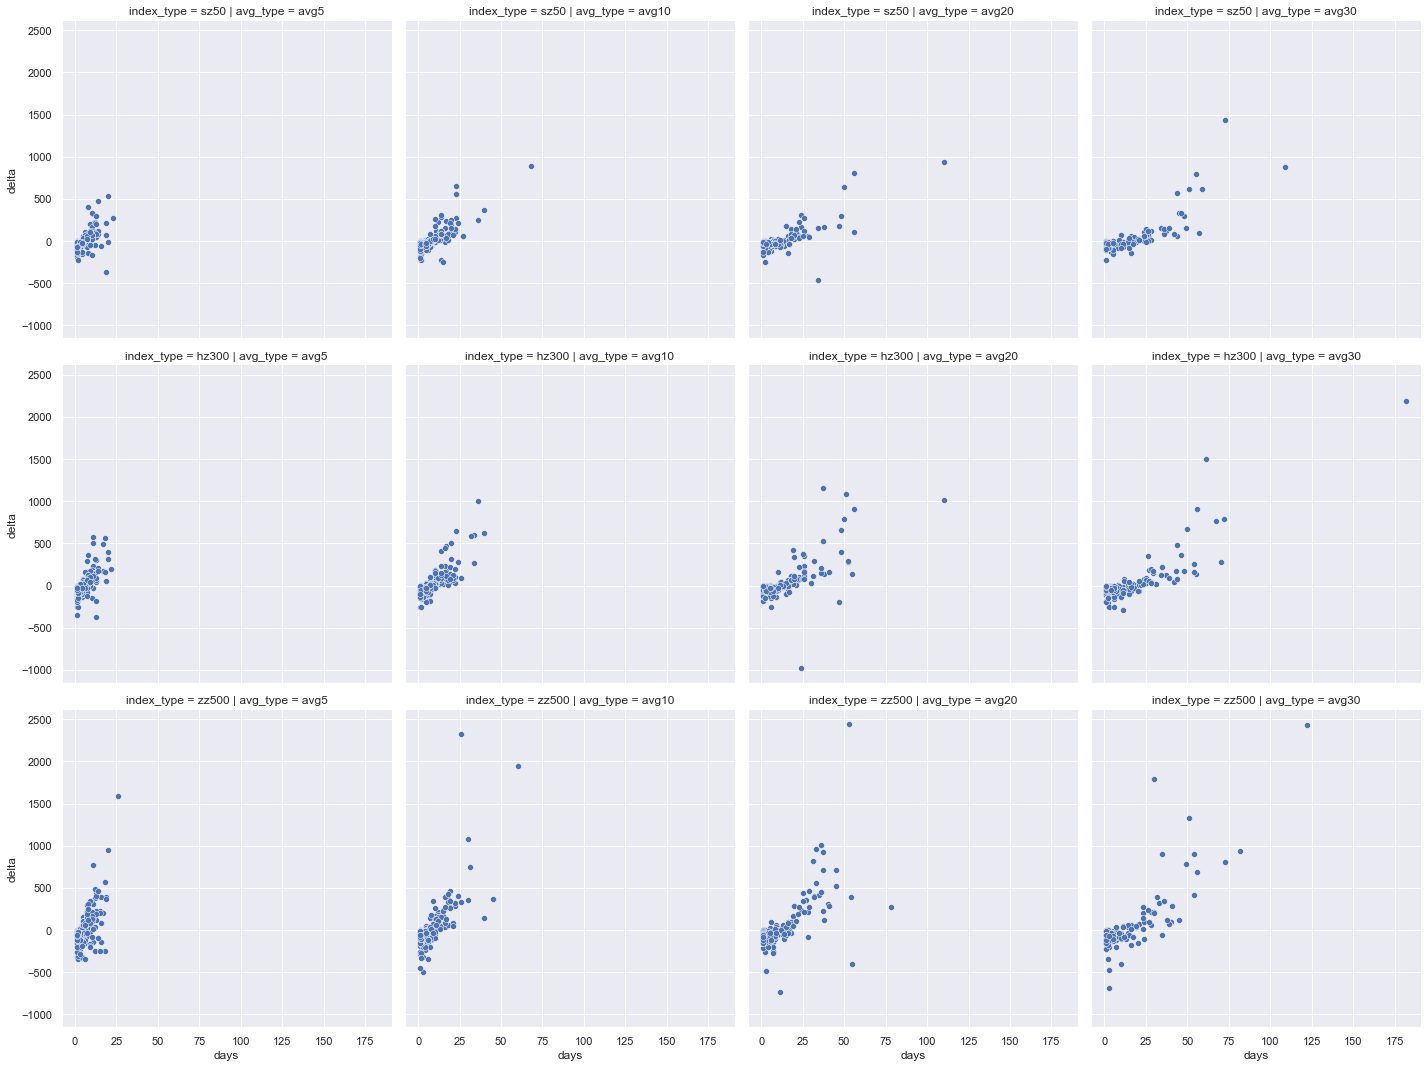

In [16]:
sns.relplot(data=alldf, x="days", y="delta", row="index_type", col="avg_type")

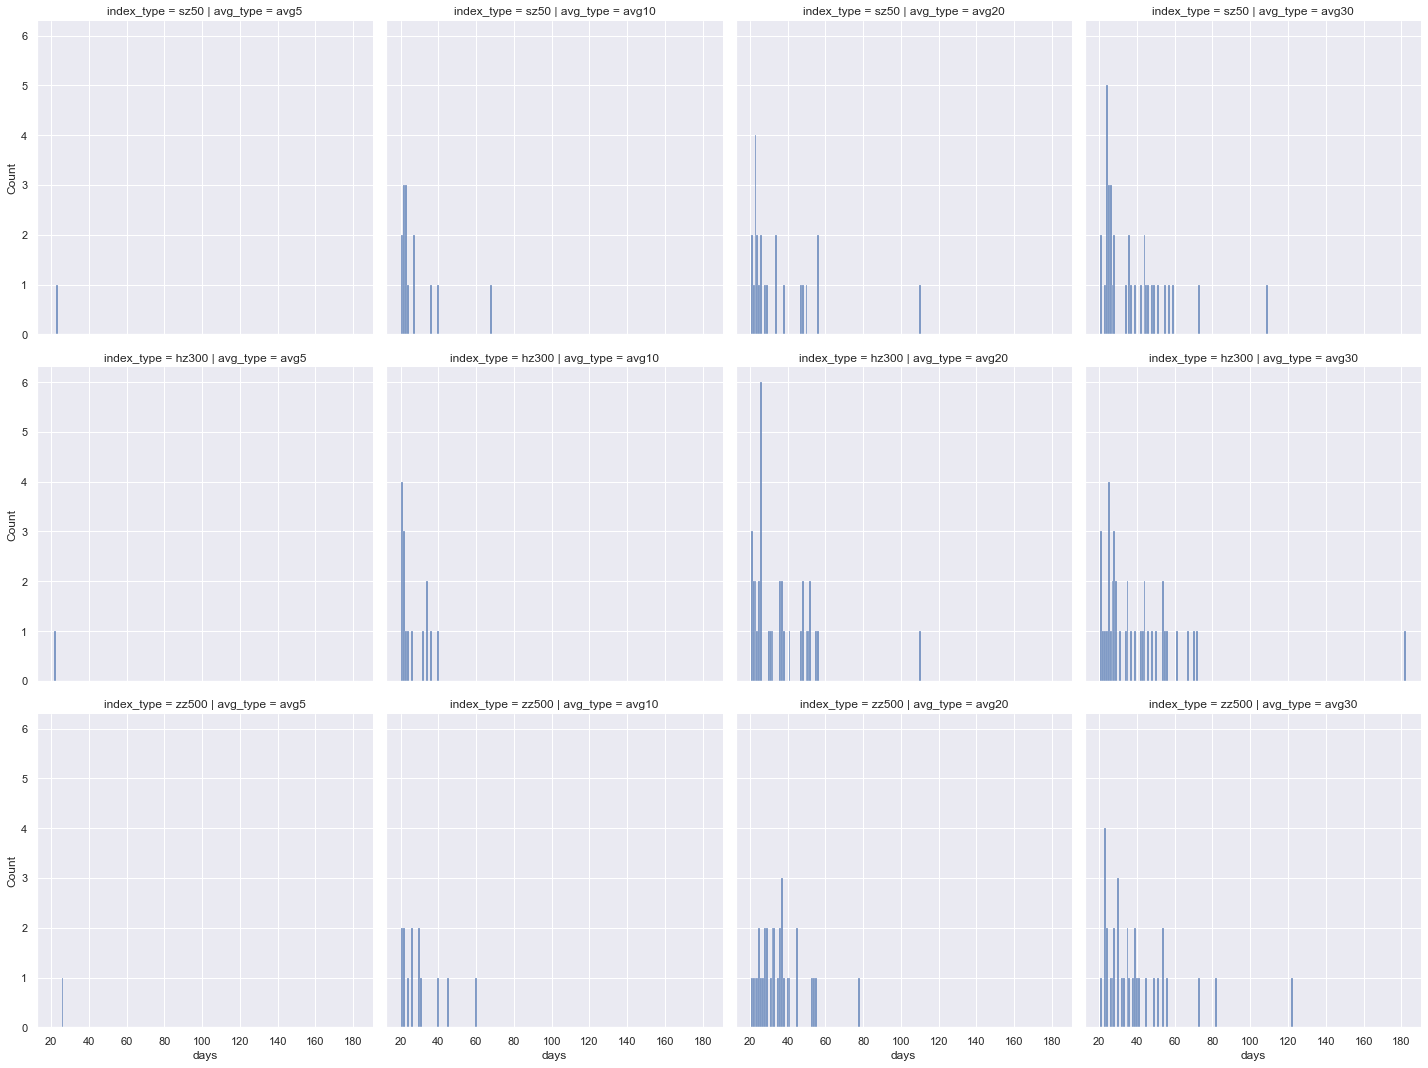

In [17]:
sns.displot(data=alldf.loc[alldf.days>20], x="days", discrete=True, row="index_type", col="avg_type")

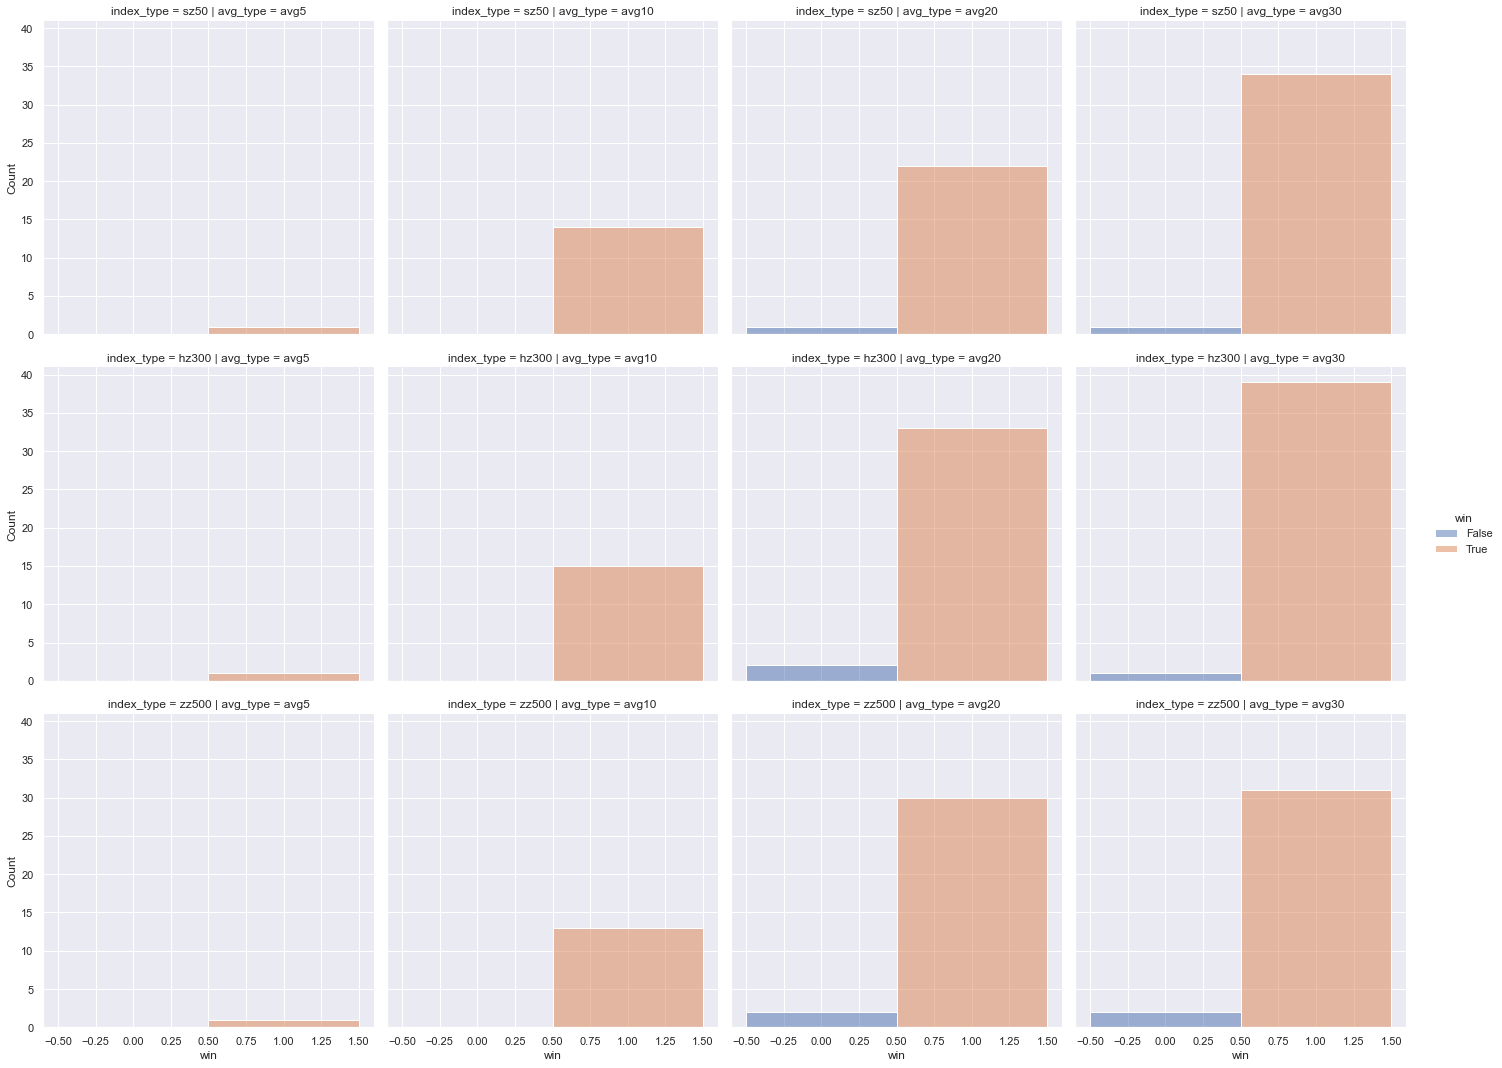

In [35]:
sns.displot(data=alldf.loc[alldf.days>20], x="win", hue="win", discrete=True, row="index_type", col="avg_type")

In [24]:
keys = ["sz50", "hz300", "zz500"]
avgs = ["avg10", "avg20", "avg30"]

data = []
for index_type in keys:
    df = alldf.loc[alldf["index_type"] == index_type]
    for avg in avgs:
        df2 = df.loc[df["avg_type"] == avg]
        below = len(df2.loc[df2.days <= 20])
        up = len(df2.loc[df2.days > 20])
        data.append((index_type, avg, 'below', below))
        data.append((index_type, avg, 'up', up))

day_df = pd.DataFrame(data, columns=["index_type", "avg_type", "days_type", "value"])
day_df

,index_type,avg_type,days_type,value
0,sz50,avg10,below,272
1,sz50,avg10,up,14
2,sz50,avg20,below,172
3,sz50,avg20,up,23
4,sz50,avg30,below,132
5,sz50,avg30,up,35
6,hz300,avg10,below,302
7,hz300,avg10,up,15
8,hz300,avg20,below,179
9,hz300,avg20,up,35


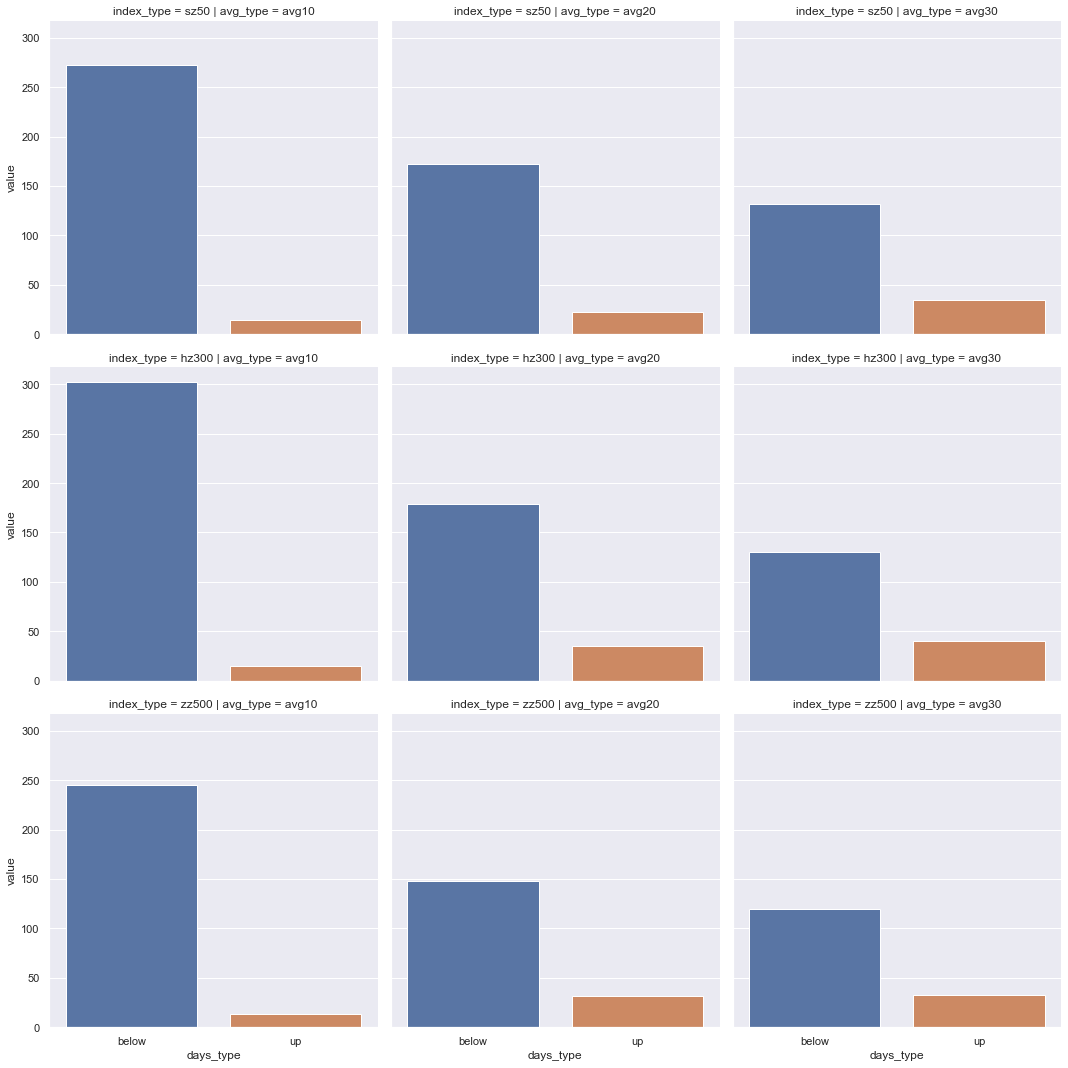

In [31]:
sns.catplot(data=day_df, x="days_type", y="value", kind="bar", row="index_type", col="avg_type")